In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [96]:
df=pd.read_csv("Train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [97]:
df.shape

(7000, 24)

In [54]:
test=pd.read_csv("Test.csv")
pd.set_option('display.max_columns', None)
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [55]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [56]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [57]:
df.drop(columns="Employee_ID",inplace=True)

In [58]:
print(df.skew())
print(test.skew())

Age                     0.243487
Education_Level        -0.404064
Time_of_service         0.800375
Time_since_promotion    0.009156
growth_rate            -0.016069
Travel_Rate             0.196371
Post_Level              0.214527
Pay_Scale              -0.259976
Work_Life_balance       0.194342
VAR1                   -0.161837
VAR2                   -0.428420
VAR3                   -0.233782
VAR4                   -0.108307
VAR5                    0.062702
VAR6                   -0.408880
VAR7                    0.068159
Attrition_rate          2.056876
dtype: float64
Age                     0.193480
Education_Level        -0.436802
Time_of_service         0.750258
Time_since_promotion   -0.019773
growth_rate            -0.000552
Travel_Rate             0.174772
Post_Level              0.205669
Pay_Scale              -0.260349
Work_Life_balance       0.225329
VAR1                   -0.229247
VAR2                   -0.486870
VAR3                   -0.275137
VAR4                   -0.05

In [59]:
df["Age"].fillna((df["Age"].median()),inplace=True)
df["Time_of_service"].fillna((df["Time_of_service"].median()),inplace=True)
df["Work_Life_balance"].fillna((df["Work_Life_balance"].median()),inplace=True)
df["VAR4"].fillna((df["VAR4"].median()),inplace=True)
df["VAR2"].fillna((df["VAR2"].median()),inplace=True)
df["Pay_Scale"].fillna((df["Pay_Scale"].median()),inplace=True)

In [60]:
test["Age"].fillna((test["Age"].median()),inplace=True)
test["Time_of_service"].fillna((test["Time_of_service"].median()),inplace=True)
test["Work_Life_balance"].fillna((test["Work_Life_balance"].median()),inplace=True)
test["VAR4"].fillna((test["VAR4"].median()),inplace=True)
test["VAR2"].fillna((test["VAR2"].median()),inplace=True)
test["Pay_Scale"].fillna((test["Pay_Scale"].median()),inplace=True)

In [61]:
test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [62]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.315429,2.367143,47.064286,0.817857,2.798000,6.006286,2.387286,3.098571,-0.016095,-0.013606,1.901286,2.834143,7.101286,3.257000,0.189376
std,13.214784,1.065102,10.268266,1.149395,15.761406,0.648205,1.163721,2.057112,1.122009,0.836377,0.948543,0.986933,0.504981,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [63]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


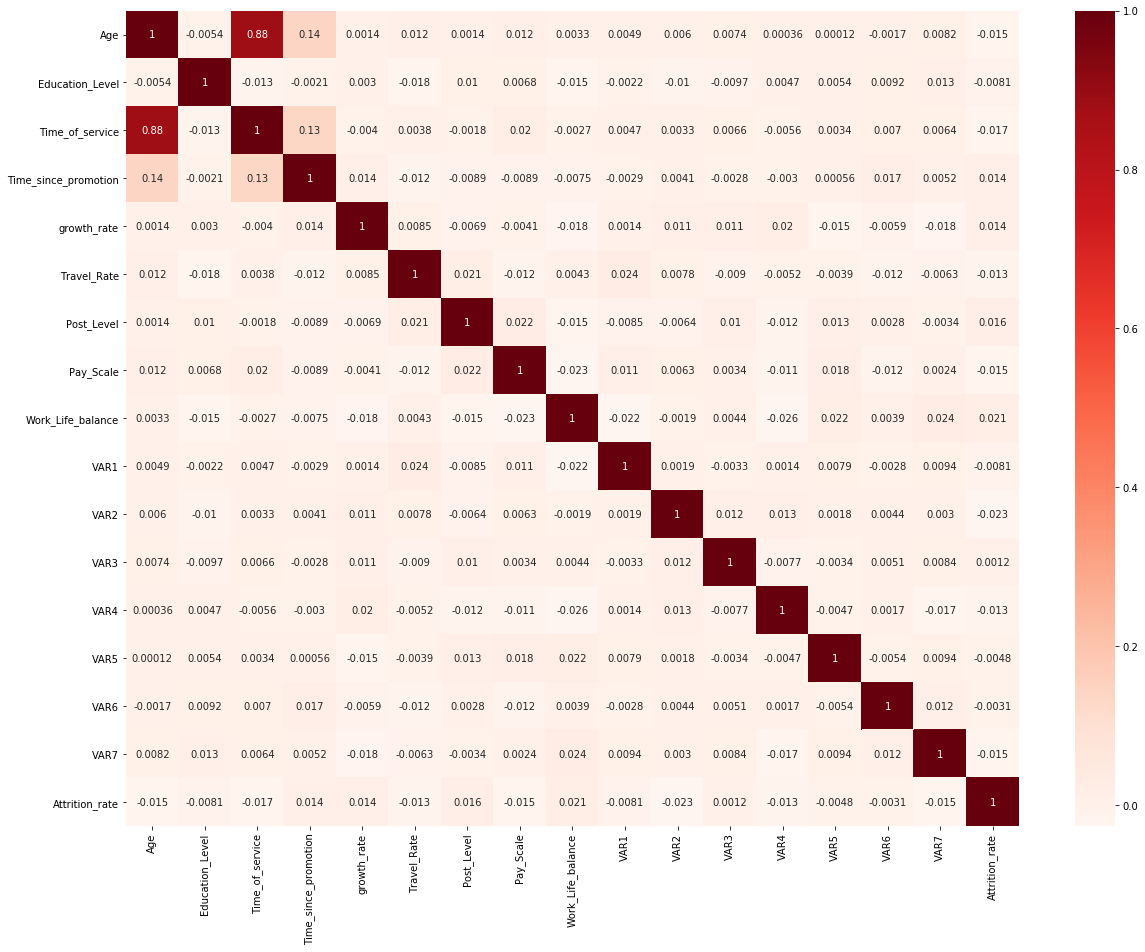

In [64]:
plt.figure(figsize=(20,15))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

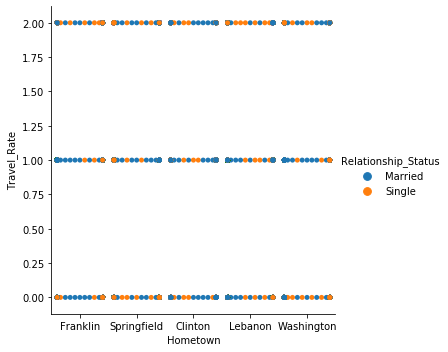

In [65]:
sns.catplot(x="Hometown", y="Travel_Rate",kind="swarm",hue="Relationship_Status", data=df);


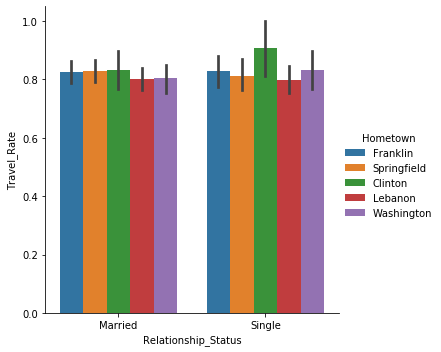

In [66]:
sns.catplot(x="Relationship_Status", y="Travel_Rate", hue="Hometown", kind="bar", data=df)

In [67]:
df.groupby(["Travel_Rate","Hometown"])["Relationship_Status"].count()

Travel_Rate  Hometown   
0            Clinton         164
             Franklin        466
             Lebanon         689
             Springfield     558
             Washington      347
1            Clinton         317
             Franklin        856
             Lebanon        1106
             Springfield     929
             Washington      619
2            Clinton          84
             Franklin        201
             Lebanon         275
             Springfield     249
             Washington      140
Name: Relationship_Status, dtype: int64

In [68]:
le = preprocessing.LabelEncoder()

In [69]:
df["Decision_skill_possess"]=le.fit_transform(df["Decision_skill_possess"])
df["Unit"]=le.fit_transform(df["Unit"])
df["Hometown"]=le.fit_transform(df["Hometown"])


In [70]:
test["Decision_skill_possess"]=le.fit_transform(test["Decision_skill_possess"])
test["Unit"]=le.fit_transform(test["Unit"])
test["Hometown"]=le.fit_transform(test["Hometown"])

In [71]:
test.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [72]:
df.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

In [73]:
cols_to_norm = ['Age', 'Education_Level','Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [74]:
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,0.500000,0.75,Married,0.25,0.181818,0.666667,0.093023,1.00,0.240741,0.5,0.00,0.666667,type2,0.50,0.75,0.749978,1.0,0.5,0.75,0.00,0.50,0.1841
1,M,0.108696,0.50,Single,0.75,0.272727,0.000000,0.116279,1.00,0.296296,0.0,0.50,0.555556,type2,0.75,0.50,0.249993,0.5,0.5,0.50,0.00,0.50,0.0670
2,F,0.847826,0.50,Married,0.00,0.727273,0.666667,0.627907,0.75,0.574074,0.0,0.25,0.777778,type2,0.00,0.75,0.249993,0.5,1.0,0.50,0.75,0.50,0.0851
3,F,0.152174,0.50,Single,0.50,0.090909,0.333333,0.093023,0.75,0.666667,0.5,0.50,0.777778,type2,0.00,0.50,0.000000,0.5,0.5,0.50,0.50,0.50,0.0668
4,F,0.260870,0.00,Married,0.75,0.272727,0.666667,0.116279,1.00,0.777778,0.5,0.50,0.111111,type3,0.50,0.00,0.749978,0.5,0.5,0.25,0.75,0.25,0.1827


In [75]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,0.282609,1.00,Single,0.75,0.818182,0.666667,0.162791,1.00,0.185185,0.5,1.0,0.333333,type2,0.00,0.50,0.249993,0.500000,0.5,0.00,0.75,0.75
1,EID_9658,M,1.000000,0.25,Single,0.50,0.181818,1.000000,0.953488,0.50,0.962963,0.5,0.0,0.000000,type2,0.00,0.75,0.249993,0.749989,0.0,0.25,0.75,0.25
2,EID_22203,M,0.717391,0.50,Married,0.75,0.909091,1.000000,0.488372,0.75,0.092593,0.0,0.0,0.777778,type3,0.00,0.75,0.499985,0.749989,0.5,0.00,1.00,0.50
3,EID_7652,M,0.673913,1.00,Single,1.00,0.363636,0.000000,0.255814,1.00,0.148148,0.5,0.0,0.111111,type0,0.75,0.50,0.499985,0.749989,0.5,0.25,0.75,0.50
4,EID_6516,F,0.543478,0.50,Married,0.25,0.818182,0.666667,0.279070,1.00,0.500000,0.5,0.5,0.111111,type2,0.75,0.75,1.000000,0.749989,0.5,0.25,0.50,0.75


In [76]:
Gender = {'M': 0,'F': 1}
df.Gender = [Gender[item] for item in df.Gender]
test.Gender=[Gender[item] for item in test.Gender]

Relationship_Status = {'Married': 0,'Single': 1}
df["Relationship_Status"] = [Relationship_Status[item] for item in df["Relationship_Status"]]
test["Relationship_Status"]=[Relationship_Status[item] for item in test["Relationship_Status"]]

In [77]:
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,1,0.500000,0.75,0,0.25,0.181818,0.666667,0.093023,1.00,0.240741,0.5,0.00,0.666667,type2,0.50,0.75,0.749978,1.0,0.5,0.75,0.00,0.50,0.1841
1,0,0.108696,0.50,1,0.75,0.272727,0.000000,0.116279,1.00,0.296296,0.0,0.50,0.555556,type2,0.75,0.50,0.249993,0.5,0.5,0.50,0.00,0.50,0.0670
2,1,0.847826,0.50,0,0.00,0.727273,0.666667,0.627907,0.75,0.574074,0.0,0.25,0.777778,type2,0.00,0.75,0.249993,0.5,1.0,0.50,0.75,0.50,0.0851
3,1,0.152174,0.50,1,0.50,0.090909,0.333333,0.093023,0.75,0.666667,0.5,0.50,0.777778,type2,0.00,0.50,0.000000,0.5,0.5,0.50,0.50,0.50,0.0668
4,1,0.260870,0.00,0,0.75,0.272727,0.666667,0.116279,1.00,0.777778,0.5,0.50,0.111111,type3,0.50,0.00,0.749978,0.5,0.5,0.25,0.75,0.25,0.1827


In [78]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,1,0.282609,1.00,1,0.75,0.818182,0.666667,0.162791,1.00,0.185185,0.5,1.0,0.333333,type2,0.00,0.50,0.249993,0.500000,0.5,0.00,0.75,0.75
1,EID_9658,0,1.000000,0.25,1,0.50,0.181818,1.000000,0.953488,0.50,0.962963,0.5,0.0,0.000000,type2,0.00,0.75,0.249993,0.749989,0.0,0.25,0.75,0.25
2,EID_22203,0,0.717391,0.50,0,0.75,0.909091,1.000000,0.488372,0.75,0.092593,0.0,0.0,0.777778,type3,0.00,0.75,0.499985,0.749989,0.5,0.00,1.00,0.50
3,EID_7652,0,0.673913,1.00,1,1.00,0.363636,0.000000,0.255814,1.00,0.148148,0.5,0.0,0.111111,type0,0.75,0.50,0.499985,0.749989,0.5,0.25,0.75,0.50
4,EID_6516,1,0.543478,0.50,0,0.25,0.818182,0.666667,0.279070,1.00,0.500000,0.5,0.5,0.111111,type2,0.75,0.75,1.000000,0.749989,0.5,0.25,0.50,0.75


In [79]:
compensation_dummies=pd.get_dummies(df["Compensation_and_Benefits"])
df=df.drop(columns="Compensation_and_Benefits")
df=pd.concat([df, compensation_dummies], axis=1)

In [80]:
compensation_dummies=pd.get_dummies(test["Compensation_and_Benefits"])
test=test.drop(columns="Compensation_and_Benefits")
test=pd.concat([test, compensation_dummies], axis=1)

In [81]:
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,type0,type1,type2,type3,type4
0,1,0.500000,0.75,0,0.25,0.181818,0.666667,0.093023,1.00,0.240741,0.5,0.00,0.666667,0.50,0.75,0.749978,1.0,0.5,0.75,0.00,0.50,0.1841,0,0,1,0,0
1,0,0.108696,0.50,1,0.75,0.272727,0.000000,0.116279,1.00,0.296296,0.0,0.50,0.555556,0.75,0.50,0.249993,0.5,0.5,0.50,0.00,0.50,0.0670,0,0,1,0,0
2,1,0.847826,0.50,0,0.00,0.727273,0.666667,0.627907,0.75,0.574074,0.0,0.25,0.777778,0.00,0.75,0.249993,0.5,1.0,0.50,0.75,0.50,0.0851,0,0,1,0,0
3,1,0.152174,0.50,1,0.50,0.090909,0.333333,0.093023,0.75,0.666667,0.5,0.50,0.777778,0.00,0.50,0.000000,0.5,0.5,0.50,0.50,0.50,0.0668,0,0,1,0,0
4,1,0.260870,0.00,0,0.75,0.272727,0.666667,0.116279,1.00,0.777778,0.5,0.50,0.111111,0.50,0.00,0.749978,0.5,0.5,0.25,0.75,0.25,0.1827,0,0,0,1,0


In [82]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,type0,type1,type2,type3,type4
0,EID_22713,1,0.282609,1.00,1,0.75,0.818182,0.666667,0.162791,1.00,0.185185,0.5,1.0,0.333333,0.00,0.50,0.249993,0.500000,0.5,0.00,0.75,0.75,0,0,1,0,0
1,EID_9658,0,1.000000,0.25,1,0.50,0.181818,1.000000,0.953488,0.50,0.962963,0.5,0.0,0.000000,0.00,0.75,0.249993,0.749989,0.0,0.25,0.75,0.25,0,0,1,0,0
2,EID_22203,0,0.717391,0.50,0,0.75,0.909091,1.000000,0.488372,0.75,0.092593,0.0,0.0,0.777778,0.00,0.75,0.499985,0.749989,0.5,0.00,1.00,0.50,0,0,0,1,0
3,EID_7652,0,0.673913,1.00,1,1.00,0.363636,0.000000,0.255814,1.00,0.148148,0.5,0.0,0.111111,0.75,0.50,0.499985,0.749989,0.5,0.25,0.75,0.50,1,0,0,0,0
4,EID_6516,1,0.543478,0.50,0,0.25,0.818182,0.666667,0.279070,1.00,0.500000,0.5,0.5,0.111111,0.75,0.75,1.000000,0.749989,0.5,0.25,0.50,0.75,0,0,1,0,0


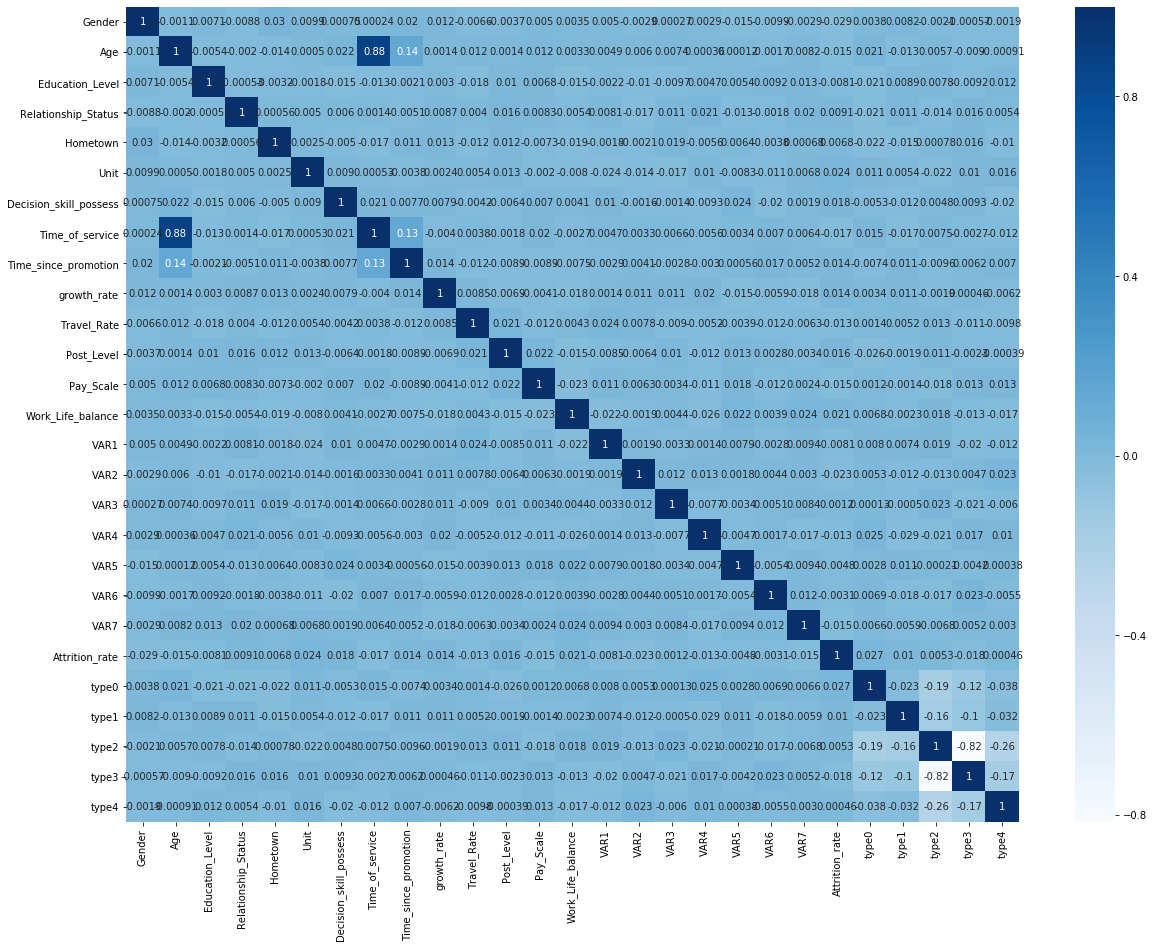

In [83]:
plt.figure(figsize=(20,15))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

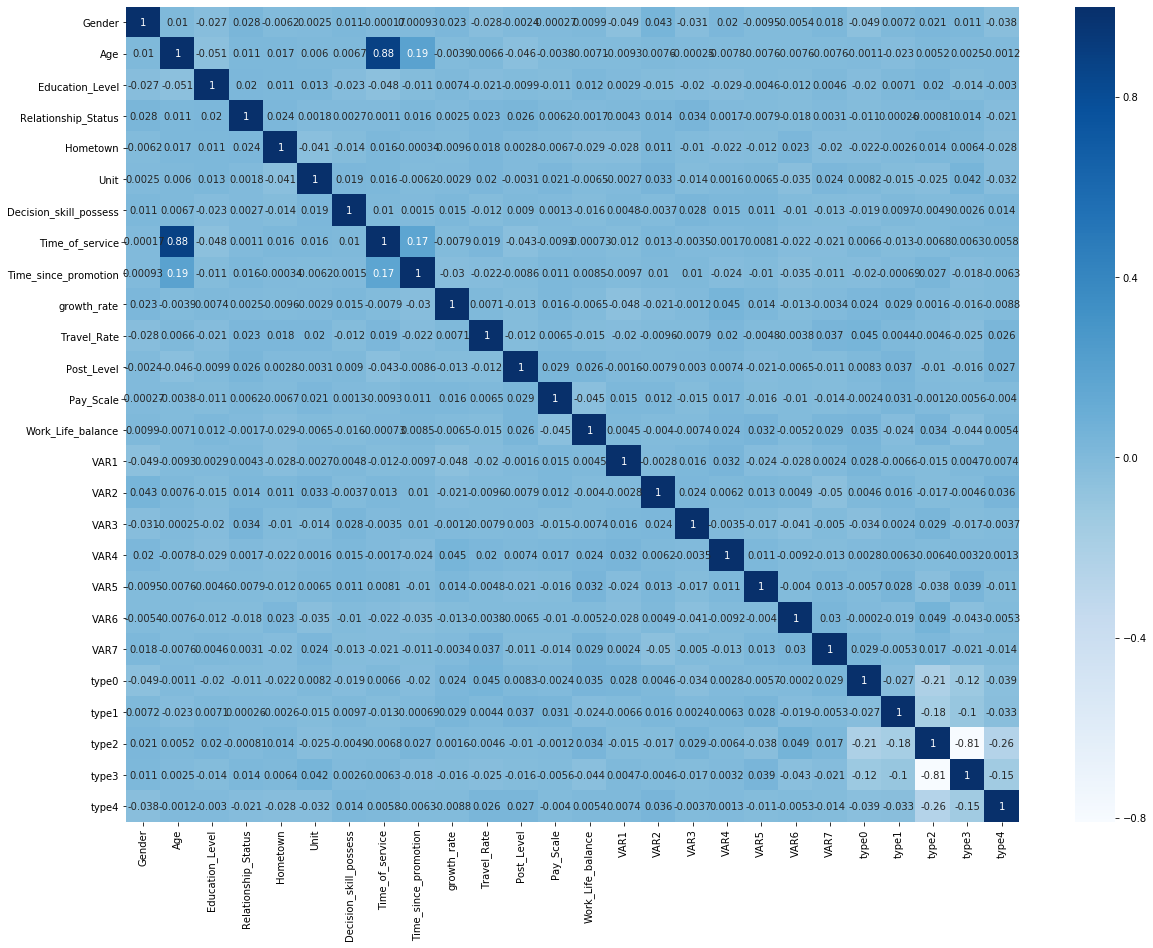

In [84]:
plt.figure(figsize=(20,15))
cor=test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [85]:
df.dtypes

Gender                      int64
Age                       float64
Education_Level           float64
Relationship_Status         int64
Hometown                  float64
Unit                      float64
Decision_skill_possess    float64
Time_of_service           float64
Time_since_promotion      float64
growth_rate               float64
Travel_Rate               float64
Post_Level                float64
Pay_Scale                 float64
Work_Life_balance         float64
VAR1                      float64
VAR2                      float64
VAR3                      float64
VAR4                      float64
VAR5                      float64
VAR6                      float64
VAR7                      float64
Attrition_rate            float64
type0                       uint8
type1                       uint8
type2                       uint8
type3                       uint8
type4                       uint8
dtype: object

In [86]:
test.dtypes

Employee_ID                object
Gender                      int64
Age                       float64
Education_Level           float64
Relationship_Status         int64
Hometown                  float64
Unit                      float64
Decision_skill_possess    float64
Time_of_service           float64
Time_since_promotion      float64
growth_rate               float64
Travel_Rate               float64
Post_Level                float64
Pay_Scale                 float64
Work_Life_balance         float64
VAR1                      float64
VAR2                      float64
VAR3                      float64
VAR4                      float64
VAR5                      float64
VAR6                      float64
VAR7                      float64
type0                       uint8
type1                       uint8
type2                       uint8
type3                       uint8
type4                       uint8
dtype: object

In [87]:
X=df.drop(columns=["Attrition_rate","Age"])
y=df["Attrition_rate"]

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [89]:
df.isnull().sum()

Gender                    0
Age                       0
Education_Level           0
Relationship_Status       0
Hometown                  0
Unit                      0
Decision_skill_possess    0
Time_of_service           0
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                 0
Work_Life_balance         0
VAR1                      0
VAR2                      0
VAR3                      0
VAR4                      0
VAR5                      0
VAR6                      0
VAR7                      0
Attrition_rate            0
type0                     0
type1                     0
type2                     0
type3                     0
type4                     0
dtype: int64

In [90]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

lasso_model=Lasso()
ridge_model=Ridge()

ridge_grid=GridSearchCV(ridge_model,param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)

lasso_grid=GridSearchCV(lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)

ridge_pred=ridge_grid.predict(X_test)
lasso_pred=lasso_grid.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,ridge_pred)))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))
# print(accuracy_score(y_test,ridge_pred))
# print(accuracy_score(y_test,lasso_pred))
print(100*max(0,1-sqrt(mean_squared_error(y_test,ridge_pred))))
print(100*max(0,1-sqrt(mean_squared_error(y_test,lasso_pred))))


print(lasso_grid.best_params_)
print(ridge_grid.best_params_)

0.18907018777993462
0.1880055849133401
81.09298122200654
81.199441508666
{'alpha': 0.006}
{'alpha': 60}


In [91]:
X_train_n = df.drop(['Attrition_rate',"Age"], axis=1)
y_train_n = df["Attrition_rate"].copy()
# X_train_n = test.drop(['Age'], axis=1)
X_test_n  = test.drop(['Employee_ID',"Age"], axis=1)
X_train_n.shape, y_train_n.shape, X_test_n.shape

((7000, 25), (7000,), (3000, 25))

In [92]:
rr=Ridge(alpha=60)
rr.fit(X_train_n, y_train_n)
Y_pred = rr.predict(X_test_n)

In [93]:
submission = pd.DataFrame({"Employee_ID": test["Employee_ID"],"Attrition_rate": Y_pred})
submission.to_csv('sample_submission.csv', index=False)